https://www.kaggle.com/datasets/tr1gg3rtrash/balanced-augmented-covid-cxr-dataset/data

--------------------------

In [ ]:
#  ! pip install -q kaggle

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets list

In [ ]:
! kaggle datasets download -d tr1gg3rtrash/balanced-augmented-covid-cxr-dataset

 98% 1.11G/1.13G [00:11<00:00, 164MB/s]
100% 1.13G/1.13G [00:11<00:00, 104MB/s]


In [ ]:
! unzip /content/balanced-augmented-covid-cxr-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Viral Pneumonia/16784.png  
  inflating: Viral Pneumonia/16785.png  
  inflating: Viral Pneumonia/16786.png  
  inflating: Viral Pneumonia/16787.png  
  inflating: Viral Pneumonia/16788.png  
  inflating: Viral Pneumonia/16789.png  
  inflating: Viral Pneumonia/16790.png  
  inflating: Viral Pneumonia/16791.png  
  inflating: Viral Pneumonia/16792.png  
  inflating: Viral Pneumonia/16793.png  
  inflating: Viral Pneumonia/16794.png  
  inflating: Viral Pneumonia/16795.png  
  inflating: Viral Pneumonia/16796.png  
  inflating: Viral Pneumonia/16797.png  
  inflating: Viral Pneumonia/16798.png  
  inflating: Viral Pneumonia/16799.png  
  inflating: Viral Pneumonia/16800.png  
  inflating: Viral Pneumonia/16801.png  
  inflating: Viral Pneumonia/16802.png  
  inflating: Viral Pneumonia/16803.png  
  inflating: Viral Pneumonia/16804.png  
  inflating: Viral Pneumonia/16805.png  
  inflating: Viral Pneumonia/16806.png  
  infl

----------------
# Import Libs

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
labels = {"COVID":-1,"Lung opacity":0,"Normal":1,"Viral Pneumonia":2}

In [ ]:
Covid_file_dirs  =['/content/COVID']

Non_Covid_file_dirs  =['/content/Lung opacity',
                       '/content/Normal',
                       '/content/Viral Pneumonia']


In [ ]:
# o = os.listdir('/content/Viral Pneumonia')
# len(o)
# path = os.path.join('/content/Lung opacity',o[i])
# path

In [ ]:
import os
def file_add_to_array(folder_path,append_array):
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        append_array.append(img_path)


covid_images = []
for dir in Covid_file_dirs:
    file_add_to_array(dir,covid_images)

not_covid_images = []
for dir in Non_Covid_file_dirs:
    file_add_to_array(dir,not_covid_images)



In [ ]:
len(not_covid_images)

21253

In [ ]:
print("Covid image: "+str( len(covid_images)))
print("Not.Covid image: "+str(len(not_covid_images)))

Covid image: 8745
Not.Covid image: 21253


In [ ]:
# need to take same samples from each categories

------------
# shuffling data & get a same size shape

In [ ]:
import random
shuffled_covid_images = random.sample(covid_images, len(covid_images))
shuffled_not_covid_images = random.sample(not_covid_images,len(not_covid_images))

shuffled_not_covid_images = shuffled_not_covid_images[:4000]
shuffled_covid_images = shuffled_covid_images[:4000]


In [ ]:
len(shuffled_covid_images)

4000

In [ ]:
data=[]
target=[]
import cv2

def get_data (image_path,target_cat):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    resizing = cv2.resize(gray,(224,224))
    data.append(resizing)
    target.append(target_cat)

In [ ]:
categories = {"COVID":1,"NORMAL":0}


for img in shuffled_covid_images:
    get_data(img,1)

for img in shuffled_not_covid_images:
    get_data(img,0)


In [ ]:
data = np.array(data)
target = np.array(target)

In [ ]:
# cheakpoint
model_data = data.copy()
model_target = target.copy()

# Building a Model


In [ ]:
#  len(data)*.75

In [ ]:
new_target=tf.keras.utils.to_categorical(target)


In [ ]:
# train_x = data[:6000]
# train_y = data[:6000]

# test_x = new_target[6000:]
# test_y = new_target[6000:]


from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(data,target,test_size=0.3)


In [ ]:
# print(test_x.shape)
# print(test_y.shape)


In [ ]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],224,224,1))
data.shape

(8000, 224, 224, 1)

In [ ]:
input_shape=data.shape[1:]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the Sequential model1
model1 = Sequential()

# Add Convolutional layers
model1.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

# Flatten the output and add Dense layers
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))  # You can experiment with the dropout rate
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(1, activation='sigmoid'))  # Binary classification, so use sigmoid activation

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# model.compile(optimizer= 'adam', loss= 'BinaryCrossentropy', metrics= ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

hist=model1.fit(train_x,train_y,epochs= 25, batch_size= 128, callbacks=[checkpoint],
                  validation_split=0.1)


Epoch 1/25
40/40 [==============================] - ETA: 0s - loss: 1.6882 - accuracy: 0.6202
Epoch 1: val_accuracy improved from -inf to 0.73750, saving model to model-001.model
40/40 [==============================] - 37s 454ms/step - loss: 1.6882 - accuracy: 0.6202 - val_loss: 0.5676 - val_accuracy: 0.7375
Epoch 2/25
40/40 [==============================] - ETA: 0s - loss: 0.5205 - accuracy: 0.7591
Epoch 2: val_accuracy improved from 0.73750 to 0.83929, saving model to model-002.model
40/40 [==============================] - 16s 392ms/step - loss: 0.5205 - accuracy: 0.7591 - val_loss: 0.4185 - val_accuracy: 0.8393
Epoch 3/25
40/40 [==============================] - ETA: 0s - loss: 0.4450 - accuracy: 0.7996
Epoch 3: val_accuracy improved from 0.83929 to 0.85357, saving model to model-003.model
40/40 [==============================] - 15s 387ms/step - loss: 0.4450 - accuracy: 0.7996 - val_loss: 0.3865 - val_accuracy: 0.8536
Epoch 4/25
40/40 [==============================] - ETA: 0s -

In [ ]:
model1.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(model1.evaluate(test_x,test_y))

75/75 [==============================] - 2s 24ms/step - loss: 0.1964 - accuracy: 0.9342
[0.19644631445407867, 0.934166669845581]


-------
# Plotting Graphs

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(0,25)

<Figure size 640x480 with 0 Axes>

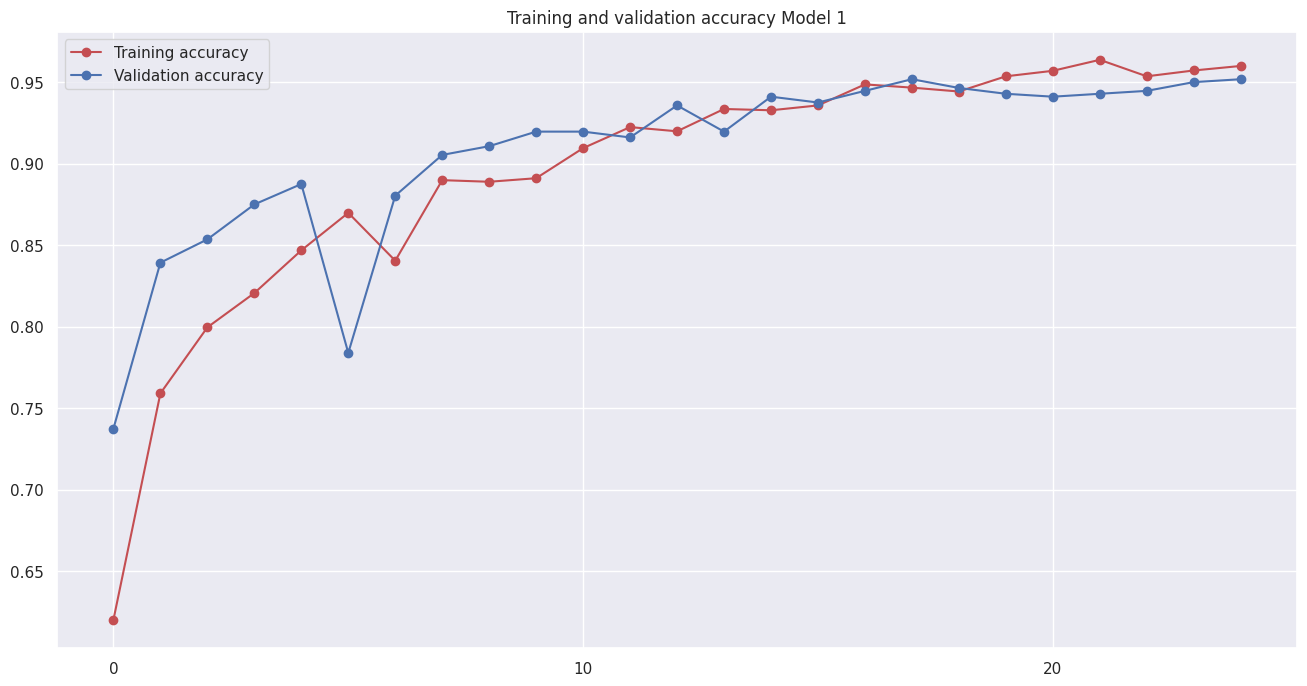

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.plot(epochs, acc, 'r', label='Training accuracy',marker = "o")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',marker = "o")
plt.title('Training and validation accuracy Model 1')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
plt.figure()

<Figure size 640x480 with 0 Axes>

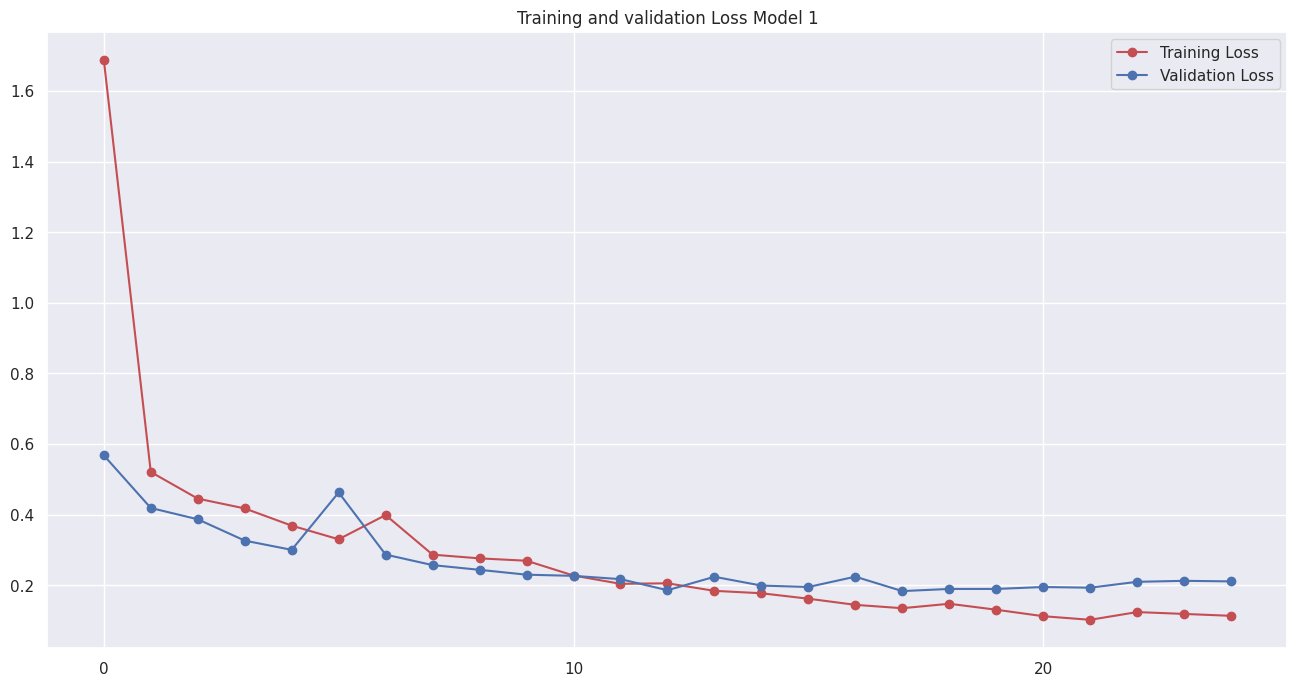

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.plot(epochs, loss, 'r', label='Training Loss',marker = "o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss',marker = "o")
plt.title('Training and validation Loss Model 1')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()

---
# Load Saved data

In [3]:
from keras.models import load_model
model = load_model('model.h5')

# Predictions

In [8]:
my_img_path = "C:/Users/AbdoEldegwy/OneDrive/Desktop/rays/covid1.png"

from keras.preprocessing import image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # img_array /= 255.0  # Normalize the pixel values to be between 0 and 1
    return img_array
my_data = preprocess_image(my_img_path)


In [9]:
# # mydata = my_data.reshape((224,224,1))
predicted = model.predict([my_data])


1/1 [==============================] - 0s 66ms/step


In [10]:
print(np.round(predicted,2))

[[1.]]
